In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 7317 images belonging to 2 classes.


In [ ]:
training_set[0][0]

array([[[[0.36643   , 0.35794806, 0.37436178],
         [0.66949695, 0.6616538 , 0.6695    ],
         [0.75980324, 0.75455815, 0.74548936],
         ...,
         [0.17417817, 0.17417817, 0.16633503],
         [0.28405553, 0.2823897 , 0.2712149 ],
         [0.3345131 , 0.33059153, 0.31755224]],

        [[0.36643   , 0.35794806, 0.37436178],
         [0.66949695, 0.6616538 , 0.6695    ],
         [0.75980324, 0.75455815, 0.74548936],
         ...,
         [0.17417817, 0.17417817, 0.16633503],
         [0.28405553, 0.2823897 , 0.2712149 ],
         [0.3345131 , 0.33059153, 0.31755224]],

        [[0.36643   , 0.35794806, 0.37436178],
         [0.66949695, 0.6616538 , 0.6695    ],
         [0.75980324, 0.75455815, 0.74548936],
         ...,
         [0.17417817, 0.17417817, 0.16633503],
         [0.28405553, 0.2823897 , 0.2712149 ],
         [0.3345131 , 0.33059153, 0.31755224]],

        ...,

        [[0.24677454, 0.23437102, 0.17089847],
         [0.55972666, 0.49209416, 0.44306993]

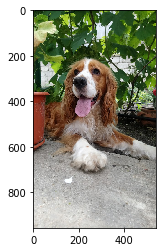

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
p = Image.open("/content/drive/MyDrive/dataset/training_set/dogs/dog.4000.jpg")
plt.imshow(p, interpolation='nearest')
plt.show()


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1985 images belonging to 2 classes.


In [ ]:
test_set[0][1]

array([0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
      dtype=float32)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3),  activation = 'relu'))#crearea layerului convolutional 2
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten()) 
model.add(Dense(64, activation = 'relu'))

#model.add(Dense(units = 1, activation = 'sigmoid')) #output layer
model.add(Dense(2)) 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [ ]:
from tensorflow.keras import optimizers
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

In [ ]:
model.fit_generator(training_set,
                    steps_per_epoch = 1,
                    epochs = 25,
                    validation_data = test_set,
                    validation_steps = 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/25
1/1 [==============================] - 143s 143s/step - loss: 0.7224 - accuracy: 0.4062 - val_loss: 0.7991 - val_accuracy: 0.5000
Epoch 2/25
1/1 [==============================] - 95s 95s/step - loss: 0.9614 - accuracy: 0.3438 - val_loss: 0.6957 - val_accuracy: 0.4859
Epoch 3/25
1/1 [==============================] - 68s 68s/step - loss: 0.6667 - accuracy: 0.6875 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/25
1/1 [==============================] - 46s 46s/step - loss: 0.7024 - accuracy: 0.3438 - val_loss: 0.6960 - val_accuracy: 0.4844
Epoch 5/25
1/1 [==============================] - 39s 39s/step - loss: 0.7138 - accuracy: 0.3125 - val_loss: 0.6920 - val_accuracy: 0.5172
Epoch 6/25
1/1 [==============================] - 26s 26s/step - loss: 0.6918 - accuracy: 0.5625 - val_loss: 0.6930 - val_accuracy: 0.4969
Epoch 7/25
1/1 [==============================] - 21s 21s/step - loss: 0.6962 - accuracy: 0.4062 - val_loss: 0.6923 - val_accuracy: 0.5375
Epoch 8/25
1/1 [=========

In [ ]:
history = model.fit(training_set,
                              steps_per_epoch = 10,
                              epochs = 50,
                              validation_data = test_set,
                              validation_steps = 20)

Epoch 1/50
10/10 [==============================] - 58s 6s/step - loss: 0.6803 - accuracy: 0.5906 - val_loss: 0.7277 - val_accuracy: 0.5063
Epoch 2/50
10/10 [==============================] - 55s 5s/step - loss: 0.6893 - accuracy: 0.5719 - val_loss: 0.6903 - val_accuracy: 0.5437
Epoch 3/50
10/10 [==============================] - 47s 5s/step - loss: 0.6799 - accuracy: 0.6084 - val_loss: 0.7011 - val_accuracy: 0.5156
Epoch 4/50
10/10 [==============================] - 47s 5s/step - loss: 0.6838 - accuracy: 0.5750 - val_loss: 0.6904 - val_accuracy: 0.5266
Epoch 5/50
10/10 [==============================] - 47s 5s/step - loss: 0.6789 - accuracy: 0.6156 - val_loss: 0.7054 - val_accuracy: 0.4906
Epoch 6/50
10/10 [==============================] - 40s 4s/step - loss: 0.6938 - accuracy: 0.5281 - val_loss: 0.6870 - val_accuracy: 0.5453
Epoch 7/50
10/10 [==============================] - 37s 4s/step - loss: 0.6854 - accuracy: 0.5594 - val_loss: 0.6865 - val_accuracy: 0.5359
Epoch 8/50
10/10 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


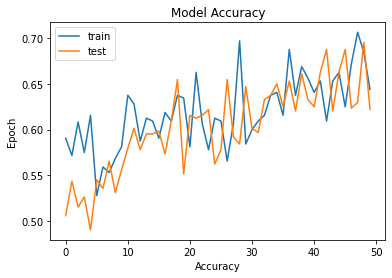

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Model1.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('/content/drive/MyDrive/Model1.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

# Новый раздел

Dog


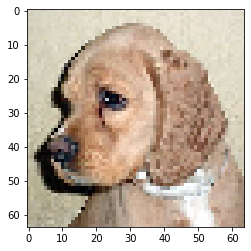

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/dataset/test_data/dog.4962.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = test_image/255
classes = ['Dog', 'Cat']
print(classes[int(result[0][0])])
plt.imshow(test_image)



